# **Earthquake magnitude prediction with Supervised Learning and Decision Tree Regressor**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Using pandas to read in the input file, database.csv 
# The data file is saved in the variable 'df'
import pandas as pd
df = pd.read_csv('../input/earthquake-database/database.csv')
df

In [ ]:
table = df.drop(columns=['Date','Time','Type','Depth','Depth Error',
                    'Depth Seismic Stations','Magnitude Type',
                    'Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance',
                    'Horizontal Error','Root Mean Square','ID','Source',
                    'Location Source','Magnitude Source','Status', 'Magnitude Error'])
#Reducing data to reflect data from 2006-2016
table.head(10)

In [ ]:
#Input data set #Conversion to arrays
X = table.drop(columns= ['Magnitude'])
X = np.array(X)
X

In [ ]:
#Output data set #Conversion to arrays
y = table['Magnitude']
#y = np.array(y)
y

In [ ]:
# Calculating Entropy of the dataset
import scipy 
k = np.unique(y).size
maxE = np.log2(k)

p_data, p_counts = np.unique(y, return_counts=True)
# counts occurrence of each value

entropy = scipy.stats.entropy(p_counts) 

# normalize the value to be between 0 and 1.
normalizedE = entropy/maxE
normalizedE


In [ ]:
# Importing the DecisionTreeRegressor package from sklearn
from sklearn.tree import DecisionTreeRegressor

# Define the decision tree regressor model
model = DecisionTreeRegressor()

# Fit the model with X and y
model.fit(X, y) 

# With the fitted model, predict two values:
#longitude and latitude of "Nepal" and "UNT, Denton"
predictions = model.predict([[28.394857,84.124008], 
                            [33.207489, -97.152588]])
print(predictions)

In [ ]:
#Saving model for future use:
import joblib
joblib.dump(model,'/kaggle/working/eqprediction.joblib')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Train Test Split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Scaling training data 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
model.fit(X_train_scaled, y_train)

#Scaling testing data
X_test_scaled = scaler.fit_transform(X_test)
y_pred = model.predict(X_test_scaled)

#calculating accuracy
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train_scaled, y_train)

score = regressor.score(X_test_scaled, y_pred)
print(y_pred,score)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=1)
model = regressor.fit(X, y)
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file='/kaggle/working/DecisionTree.dot') 
#see end of code for Decision Tree

In [ ]:
#Calculating mean sqaured error
from sklearn.metrics import mean_squared_error
error_score = mean_squared_error(y_test, y_pred)
error_score

In [ ]:
from sklearn.metrics import mean_squared_log_error
score = mean_squared_log_error(y_test, y_pred)
score

In [ ]:
#Testing the saved model 
# Load saved model
model_test = joblib.load('eqprediction.joblib')

#TODO: With the fitted model, predict a value for Honshu, Japan 
model_test_pred = model_test.predict([[36.175132, 138.041200],[33.207489, -97.152588]])
print(model_test_pred)

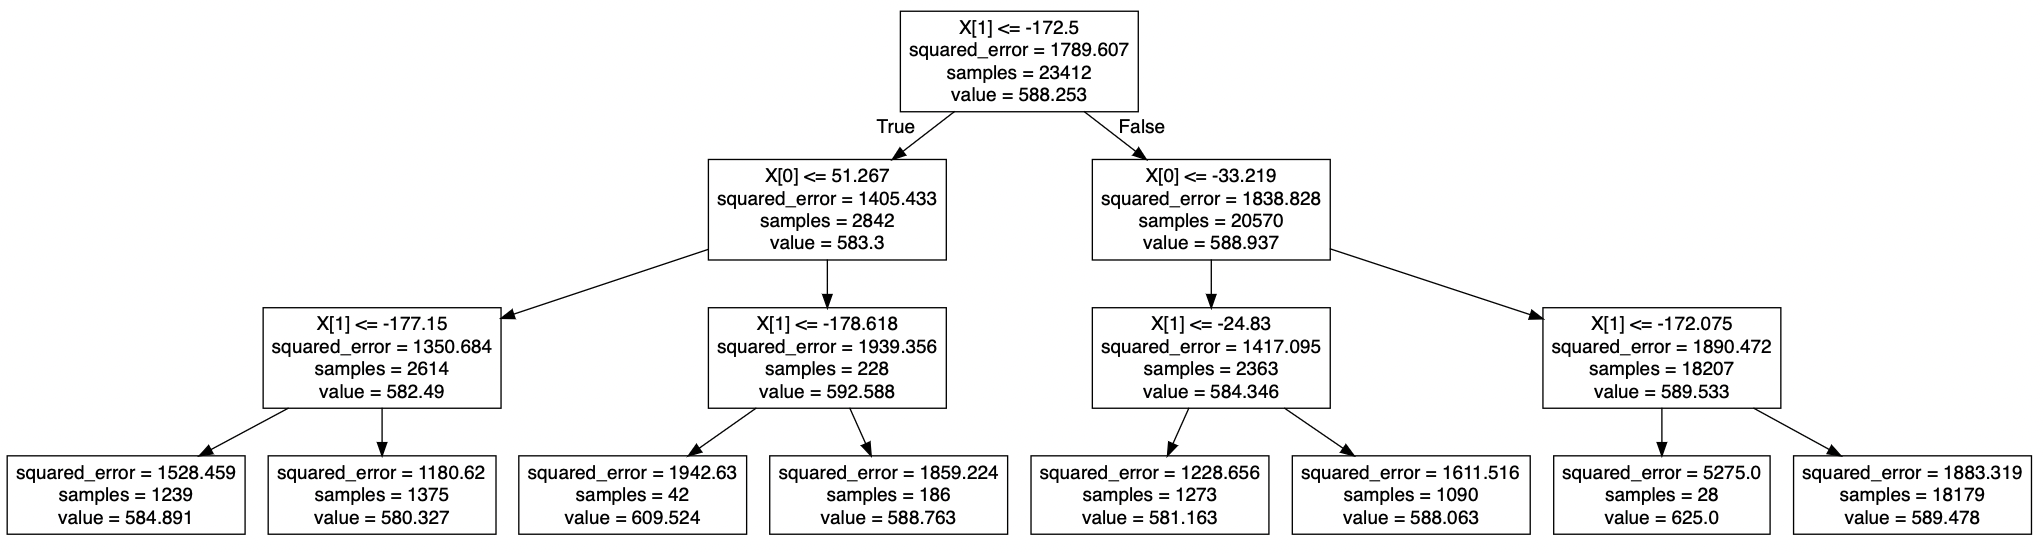